In [37]:
import glob
import pandas as pd
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt

In [38]:
folds = glob.glob("folds/*")

for i, fold in enumerate(folds):
    with open(fold, "rb") as f:
        fold_dict = pkl.load(f)

    y_test = fold_dict["y_test"]

    if i == 0:
        global_target = y_test

    else:
        global_target = np.vstack((global_target,y_test))

global_target.shape

(38331, 1)

numero de redes treinadas:  548


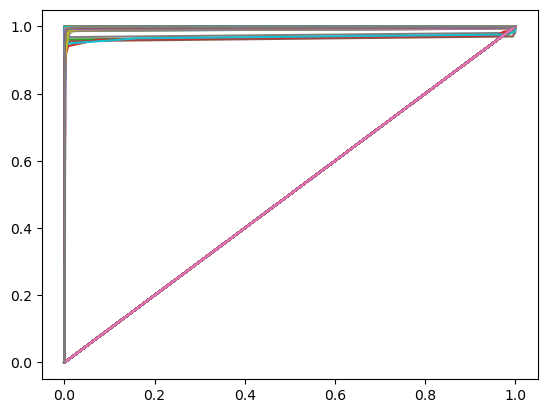

In [59]:
def tpr(tp,fn):
    return tp/(tp+fn)

def tnr(tn,fp):
    return tn/(tn+fp)

def ppv (tp,fp):
    tp/(tp+fp)

def fpr(fp,tn):
    return fp/(fp+tn) 

def balanced_acc(tpr,tnr):
    return (tpr+tnr)/2

def f1(ppv,tpr):
    2*ppv*tpr/(ppv+tpr)

results_list = glob.glob("grid_results/*")

print("numero de redes treinadas: ", len(results_list))

for file in results_list:
    with open(file, "rb") as handle:
        result = pkl.load(handle)["y_predict"]

    threshold_eval = np.linspace (min(result),max(result),num=50)

    TPR = []
    FPR = []
    for thres in threshold_eval:

        predictions = np.zeros(result.shape)

        predictions[result < thres] = 1

        # True Positive (TP): we predict a label of 1 (positive), and the true label is 1.
        TP = np.sum(np.logical_and(predictions == 1, global_target == 1))
        
        # True Negative (TN): we predict a label of 0 (negative), and the true label is 0.
        TN = np.sum(np.logical_and(predictions == 0, global_target == 0))
        
        # False Positive (FP): we predict a label of 1 (positive), but the true label is 0.
        FP = np.sum(np.logical_and(predictions == 1, global_target == 0))
        
        # False Negative (FN): we predict a label of 0 (negative), but the true label is 1.
        FN = np.sum(np.logical_and(predictions == 0, global_target == 1))

        TPR.append(tpr(TP,FN))        
        FPR.append(fpr(FP,TN))

    plt.plot(FPR,TPR)


plt.show()
        